In [62]:
import numpy as np
import pandas as pd

In [63]:
data=pd.read_csv("Data/USA_Housing.csv")

In [64]:
val1 = data.iloc[:,:1]
val2 = data.iloc[:, 5:6]

In [65]:
data2 = pd.concat([val1, val2], axis=1)

In [66]:
data2

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [67]:
x = data2.iloc[:,:-1].values
y = data2.iloc[:,-1].values

# 4 separation des  data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state =40)

In [70]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("x_test shape",y_test.shape)

x_train shape (3750, 1)
x_test shape (1250, 1)
y_train shape (3750,)
x_test shape (1250,)


# 5 Construire le modele 

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model_linear = LinearRegression()

In [73]:
# entrainer le modele

In [74]:
model_linear.fit(x_train,y_train)

LinearRegression()

In [75]:
LinearRegression()

LinearRegression()

In [76]:
# faire la prediction
y_Score_predicts = model_linear.predict(x_test)

In [77]:
y_Score_predicts

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [78]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [79]:
resultats = pd.DataFrame(y_test, y_Score_predicts)

In [80]:
resultats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [81]:
# evaluation du modele

from sklearn.metrics import mean_squared_error, r2_score

In [82]:
print("le MSE de la regression lineaire",mean_squared_error(y_test,  y_Score_predicts))

le MSE de la regression lineaire 70345556190.3212


In [83]:
print("le MSE de la regression lineaire",r2_score(y_test,  y_Score_predicts))

le MSE de la regression lineaire 0.43322233931263276


# la visualisation

In [84]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

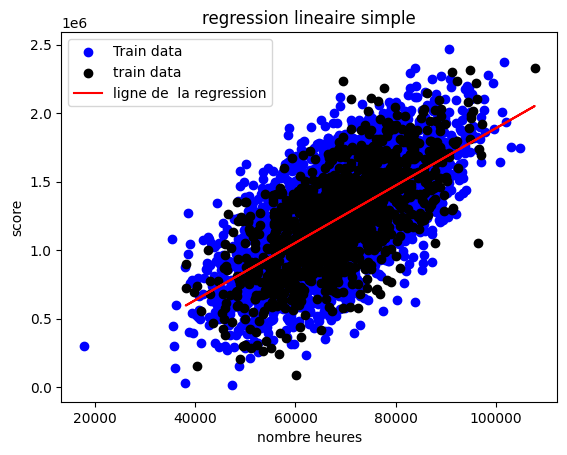

In [85]:
plt.scatter(x_train,y_train, color="blue",label="Train data")
plt.scatter(x_test,y_test, color="black",label="train data")

plt.plot(x_test, y_Score_predicts, color="red",label="ligne de  la regression")
plt.xlabel("nombre heures")
plt.ylabel("score")
plt.legend()
plt.title("regression lineaire simple")
plt.show

# 7 la prediction simple

In [87]:
resultats= pd.DataFrame({'y-score-reel' : y_test, 'y-scores-predits': y_Score_predicts, "difference":y_test-y_Score_predicts,})

In [88]:
resultats

,y-score-reel,y-scores-predits,difference
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504


In [89]:
print(model_linear.predict([[500]]))

[-191850.56888453]
